### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [6]:
## import the liabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


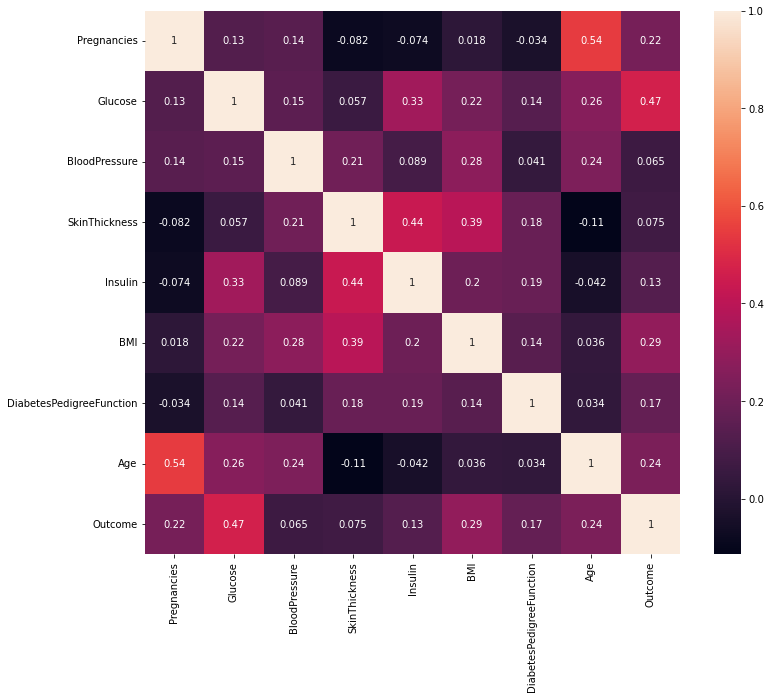

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

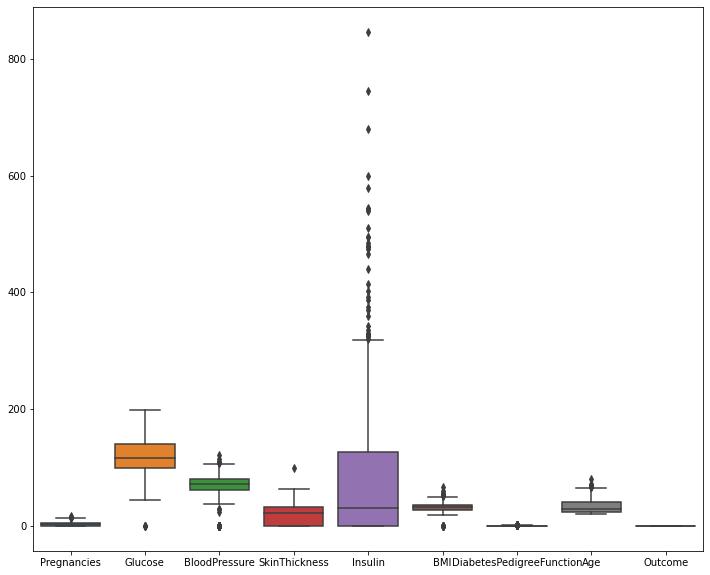

In [8]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data)
plt.show()

In [11]:
##insulin have ourliers
data['Insulin'].head()

0      0
1      0
2      0
3     94
4    168
Name: Insulin, dtype: int64

In [15]:
print('min',data['Insulin'].min())
print('max',data['Insulin'].max())

min 0
max 846


## removeing outliers an insulin
### 75% percenat of vaue is : 127.250000

In [18]:
data[data['Insulin']>127]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
740,11,120,80,37,150,42.3,0.785,48,1
744,13,153,88,37,140,40.6,1.174,39,0
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


In [21]:
df_copy=data[data['Insulin']<127]

In [24]:
df_copy.shape

(575, 9)

In [29]:
df_copy['Insulin'].mean()

27.25913043478261

<AxesSubplot:xlabel='Insulin'>

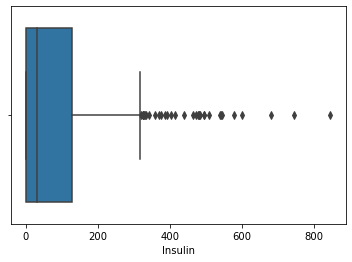

In [32]:
sns.boxplot(data['Insulin'])

In [34]:
Q1 = np.percentile(data['Insulin'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Insulin'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

127.5

In [38]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(data['Insulin']>=upper)
print("Upper Bound:",upper)
print(upper)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(data['Insulin']<=lower)
print("Lower Bound:",lower)
print(lower)

Upper Bound: 318.75
318.75
Lower Bound: -191.25
-191.25


In [40]:
## 
data=data[data['Insulin']<=318.75]

In [41]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Insulin'>

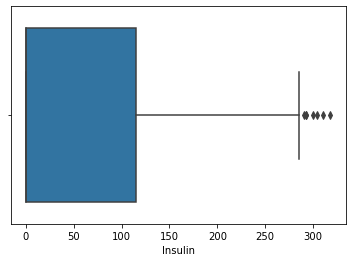

In [42]:
sns.boxplot(data['Insulin'])

#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [44]:
## independent and dependent
X=data.drop('Outcome', axis=1)
y=data['Outcome']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
classifier=DecisionTreeClassifier()

In [50]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_predict=classifier.predict(X_test)

In [53]:
y_predict

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1], dtype=int64)

In [54]:
## 
from sklearn import tree

In [ ]:
plt.figure(figsize=(20,25))
tree.plot_tree(classifier,filled=True)
plt.show()

In [ ]:
from skle